# Ev Fiyat Tahmini

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## Veri Setimizi Yukluyoruz

In [5]:
df = pd.read_csv("kc_house_data.csv")

## Veri Setimizi Inceliyoruz

In [6]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

## Tarihi Objeden Datetime'a Ceviriyoruz

In [13]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [18]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Eksik Verilerimize Bakiyoruz. Eksik Verimiz Yok

In [14]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [19]:
df.corr()

C:\Users\tkaan\AppData\Local\Temp\ipykernel_8680\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


C:\Users\tkaan\AppData\Local\Temp\ipykernel_8680\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

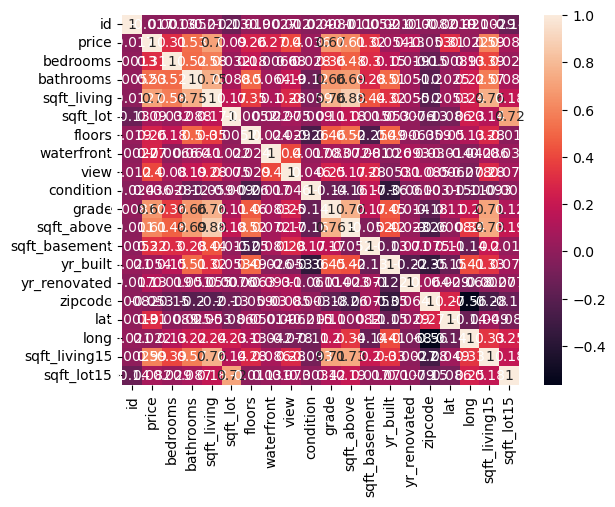

In [16]:
sns.heatmap(df.corr(),annot=True)

## Diger Kolonlarin Fiyat Kolonuna Olan Korelasyonuna Bakiyoruz

In [20]:
abs(df.corr()['price']).sort_values(ascending=False) 

C:\Users\tkaan\AppData\Local\Temp\ipykernel_8680\875584141.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  abs(df.corr()['price']).sort_values(ascending=False)


price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
zipcode          0.053203
condition        0.036362
long             0.021626
id               0.016762
Name: price, dtype: float64

## X, Train Datasetimizde Price Kolonuna Baglantisi Az Olanlari Cikartiyoruz

In [21]:
korelasyon_matrisi = df.corr()

C:\Users\tkaan\AppData\Local\Temp\ipykernel_8680\1715811118.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  korelasyon_matrisi = df.corr()


In [22]:
korelasyon_matrisi

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [23]:
price_korelasyon = korelasyon_matrisi['price']

In [24]:
price_korelasyon

id              -0.016762
price            1.000000
bedrooms         0.308350
bathrooms        0.525138
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
view             0.397293
condition        0.036362
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
yr_built         0.054012
yr_renovated     0.126434
zipcode         -0.053203
lat              0.307003
long             0.021626
sqft_living15    0.585379
sqft_lot15       0.082447
Name: price, dtype: float64

In [25]:
esik_degeri = 0.2

In [26]:
yuksek_korelasyonlu_kolonlar = price_korelasyon[abs(price_korelasyon) > esik_degeri].index

In [163]:
x = df[yuksek_korelasyonlu_kolonlar]

In [28]:
x

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,lat,sqft_living15
0,221900.0,3,1.00,1180,1.0,0,0,7,1180,0,47.5112,1340
1,538000.0,3,2.25,2570,2.0,0,0,7,2170,400,47.7210,1690
2,180000.0,2,1.00,770,1.0,0,0,6,770,0,47.7379,2720
3,604000.0,4,3.00,1960,1.0,0,0,7,1050,910,47.5208,1360
4,510000.0,3,2.00,1680,1.0,0,0,8,1680,0,47.6168,1800
...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,3.0,0,0,8,1530,0,47.6993,1530
21609,400000.0,4,2.50,2310,2.0,0,0,8,2310,0,47.5107,1830
21610,402101.0,2,0.75,1020,2.0,0,0,7,1020,0,47.5944,1020
21611,400000.0,3,2.50,1600,2.0,0,0,8,1600,0,47.5345,1410


In [29]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


## X Degiskenine Price Ve Korelasyon Degerleri Az Olan Kolonlari Cikartip Geri Kalanini Atadik

## Y Degiskenine Ise Tahminleri Karsilastiracagi Ve Train Kisminda Bakacagi Price Kolonunu Yani Tahmin Edecegimiz Veriyi Atadik

In [166]:
x = x.drop('price', axis=1)

In [31]:
x

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,lat,sqft_living15
0,3,1.00,1180,1.0,0,0,7,1180,0,47.5112,1340
1,3,2.25,2570,2.0,0,0,7,2170,400,47.7210,1690
2,2,1.00,770,1.0,0,0,6,770,0,47.7379,2720
3,4,3.00,1960,1.0,0,0,7,1050,910,47.5208,1360
4,3,2.00,1680,1.0,0,0,8,1680,0,47.6168,1800
...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,3.0,0,0,8,1530,0,47.6993,1530
21609,4,2.50,2310,2.0,0,0,8,2310,0,47.5107,1830
21610,2,0.75,1020,2.0,0,0,7,1020,0,47.5944,1020
21611,3,2.50,1600,2.0,0,0,8,1600,0,47.5345,1410


In [34]:
y = df[["price"]]

In [35]:
y

,price
0,221900.0
1,538000.0
2,180000.0
3,604000.0
4,510000.0
...,...
21608,360000.0
21609,400000.0
21610,402101.0
21611,400000.0


## Simdi X Ve Y Setlerimiz Hazir, Sirada Egitime Geciyoruz

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Burada Test Ve Train Setlerini Ayiriyoruz. %80'e %20 Olacak Sekilde. random_state Degerini 42 Olarak Atadik

In [118]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [100]:
x_train.shape, x_test.shape

((17290, 11), (4323, 11))

In [101]:
y_train.shape, y_test.shape

((17290, 1), (4323, 1))

In [102]:
x_train

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,lat,sqft_living15
5268,3,1.00,1570,1.0,0,0,7,1070,500,47.6942,1770
16909,3,2.50,1780,1.0,0,0,8,1210,570,47.5574,2310
16123,3,1.50,1090,1.0,0,0,8,1090,0,47.6256,1710
12181,4,2.50,2210,2.0,0,0,8,2210,0,47.4206,1970
12617,3,2.50,1800,2.0,0,0,7,1240,560,47.6460,1790
...,...,...,...,...,...,...,...,...,...,...,...
13123,5,5.00,3960,2.0,0,0,10,3960,0,47.3800,2240
19648,2,2.50,1400,2.0,0,0,8,1160,240,47.5342,1060
9845,3,2.25,2360,1.0,0,0,9,2360,0,47.3856,2720
10799,4,2.00,2370,2.0,0,0,8,2370,0,47.2831,2110


In [103]:
y_train

,price
5268,495000.0
16909,635000.0
16123,382500.0
12181,382500.0
12617,670000.0
...,...
13123,1180000.0
19648,299000.0
9845,431000.0
10799,411000.0


## ML'e Geciyoruz

In [119]:
lr = LinearRegression()

In [120]:
model = lr.fit(x_train,y_train)

In [121]:
tahmin = model.predict(x_test)

## Basari Oranimizi Gormek Icin Gerekli Modelleri Import Ediyoruz

In [122]:
from sklearn.metrics import mean_squared_error, r2_score

In [123]:
(mean_squared_error(tahmin,y_test))**.5

226195.0281614672

In [124]:
r2_score(tahmin,y_test)

0.4671099688761732

## Ridge,Lasso Icin Tahminler Yapicaz

In [125]:
from sklearn.linear_model import Ridge,Lasso

In [126]:
R=Ridge()
L=Lasso()

In [127]:
R.fit(x_train,y_train)
tahmin2=R.predict(x_test)

In [128]:
L.fit(x_train,y_train)
tahmin3=R.predict(x_test)

In [129]:
(mean_squared_error(tahmin2,y_test))**.5

226238.64826809254

In [130]:
r2_score(tahmin2,y_test)

0.4676048964971462

In [131]:
(mean_squared_error(tahmin3,y_test))**.5

226238.64826809254

In [132]:
r2_score(tahmin3,y_test)

0.4676048964971462

## Su Anda Basari Oranlarimiz Kotu Durumda. Ortalama 226K Bir Fiyat Sapmasi Var

In [133]:
x

,bedrooms,bathrooms,sqft_living,floors,waterfront,view,grade,sqft_above,sqft_basement,lat,sqft_living15
0,3,1.00,1180,1.0,0,0,7,1180,0,47.5112,1340
1,3,2.25,2570,2.0,0,0,7,2170,400,47.7210,1690
2,2,1.00,770,1.0,0,0,6,770,0,47.7379,2720
3,4,3.00,1960,1.0,0,0,7,1050,910,47.5208,1360
4,3,2.00,1680,1.0,0,0,8,1680,0,47.6168,1800
...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,3.0,0,0,8,1530,0,47.6993,1530
21609,4,2.50,2310,2.0,0,0,8,2310,0,47.5107,1830
21610,2,0.75,1020,2.0,0,0,7,1020,0,47.5944,1020
21611,3,2.50,1600,2.0,0,0,8,1600,0,47.5345,1410


In [134]:
x['view'].nunique()

5

In [135]:
x.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view',
       'grade', 'sqft_above', 'sqft_basement', 'lat', 'sqft_living15'],
      dtype='object')

## Random State Degerimizi 0 Olarak Ayarliyoruz.

In [149]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)

In [150]:
lr = LinearRegression()

In [151]:
model = lr.fit(x_train,y_train)

In [152]:
tahmin = model.predict(x_test)

In [153]:
(mean_squared_error(tahmin,y_test))**.5

203575.91417864003

In [154]:
r2_score(tahmin,y_test)

0.5102264618623225

## Biraz Iyilesme Var Ama Hala Iyi Degil

In [155]:
x.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view',
       'grade', 'sqft_above', 'sqft_basement', 'lat', 'sqft_living15'],
      dtype='object')

In [156]:
x = x.drop('lat', axis=1)

In [157]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)

In [158]:
lr = LinearRegression()

In [159]:
model = lr.fit(x_train,y_train)

In [160]:
tahmin = model.predict(x_test)

In [161]:
(mean_squared_error(tahmin,y_test))**.5

222272.01233407794

In [162]:
r2_score(tahmin,y_test)

0.3558843265103867

In [164]:
abs(df.corr()['price']).sort_values(ascending=False) 

C:\Users\tkaan\AppData\Local\Temp\ipykernel_8680\875584141.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  abs(df.corr()['price']).sort_values(ascending=False)


price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
zipcode          0.053203
condition        0.036362
long             0.021626
id               0.016762
Name: price, dtype: float64

In [167]:
x.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view',
       'grade', 'sqft_above', 'sqft_basement', 'lat', 'sqft_living15'],
      dtype='object')

In [531]:
esik_degeri = 0

In [532]:
yuksek_korelasyonlu_kolonlar = price_korelasyon[abs(price_korelasyon) > esik_degeri].index

In [533]:
x = df[yuksek_korelasyonlu_kolonlar]

In [534]:
x = x.drop('price', axis=1)

In [535]:
x = x.drop('id', axis=1)

In [536]:
# 'zipcode', 'lat', 'long', 'yr_renovated', 'sqft_living15', 'sqft_lot15', 'sqft_above',

In [537]:
x.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [538]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [539]:
lr = LinearRegression()

In [540]:
model = lr.fit(x_train,y_train)

In [541]:
tahmin = model.predict(x_test)

In [542]:
(mean_squared_error(tahmin,y_test))**.5

190473.37551184618

In [543]:
r2_score(tahmin,y_test)

0.5961413354138327

In [544]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [545]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [546]:
R.fit(x_train,y_train)
tahmin2=R.predict(x_test)

In [547]:
L.fit(x_train,y_train)
tahmin3=R.predict(x_test)

C:\Users\tkaan\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.276e+14, tolerance: 2.398e+11
  model = cd_fast.enet_coordinate_descent(


In [548]:
(mean_squared_error(tahmin2,y_test))**.5

190451.26288446545

In [549]:
r2_score(tahmin2,y_test)

0.5959851999311281

In [550]:
(mean_squared_error(tahmin3,y_test))**.5

190451.26288446545

In [551]:
r2_score(tahmin3,y_test)

0.5959851999311281

## Kolonlarin Hepsini Alarak Ve Random State'i 0'a Cekerek Max 0.59 Basari Gorduk
## Hala 190K lik Bir Fiyat Yanilgisi Var

In [552]:
x.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [553]:
x.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Yuksek degerleri cikartip deneme

In [1]:
import pandas as pd
import numpy as np 
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


C:\Users\tkaan\AppData\Local\Temp\ipykernel_7160\1786434822.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(features.corr(), center=0);


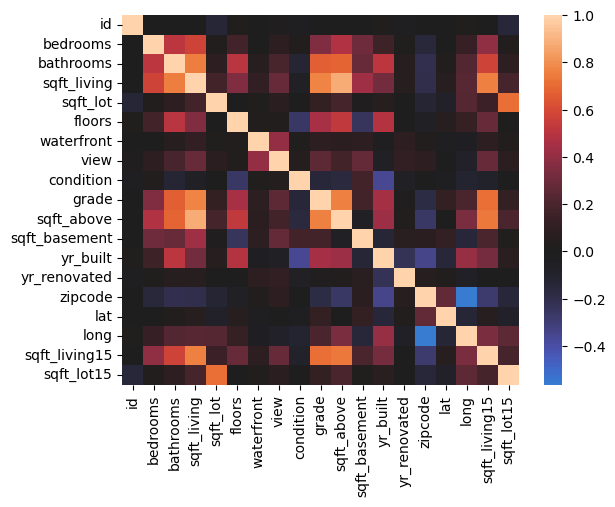

In [4]:
features = df.drop('price', axis=1)
sns.heatmap(features.corr(), center=0);

In [5]:
abs(features.corr()) > 0.8

C:\Users\tkaan\AppData\Local\Temp\ipykernel_7160\2911026821.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  abs(features.corr()) > 0.8


,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
grade,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


C:\Users\tkaan\AppData\Local\Temp\ipykernel_7160\689887770.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.price);


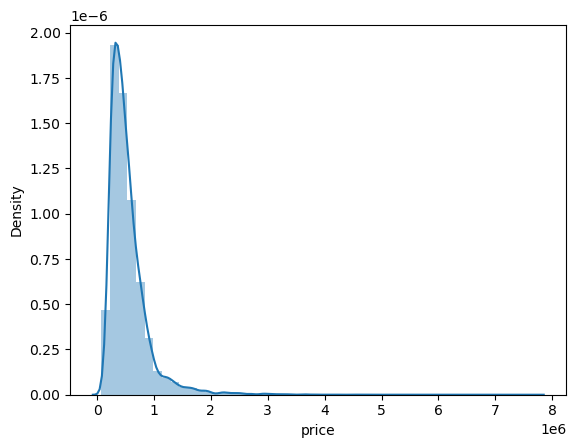

In [6]:
sns.distplot(df.price);

C:\Users\tkaan\AppData\Local\Temp\ipykernel_7160\2061586639.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.price);


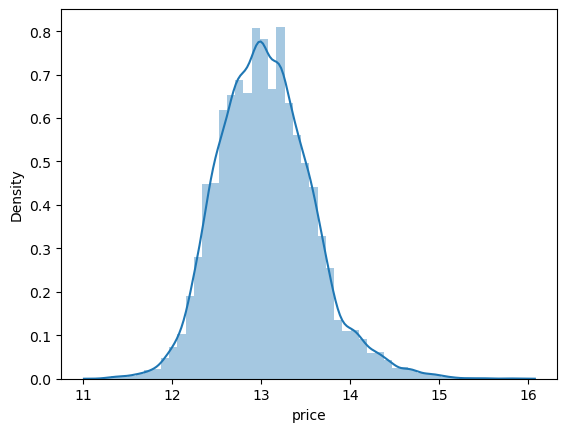

In [7]:
df.price = np.log(df.price)
sns.distplot(df.price);

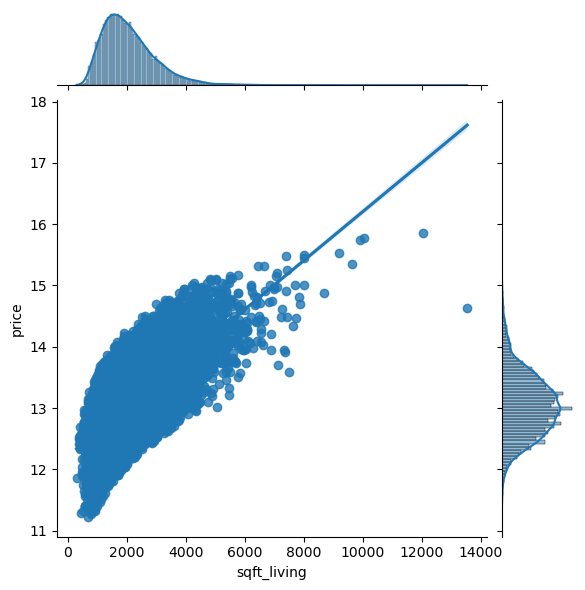

In [14]:
sns.jointplot(x=df['sqft_living'], y=df['price'], kind='reg')

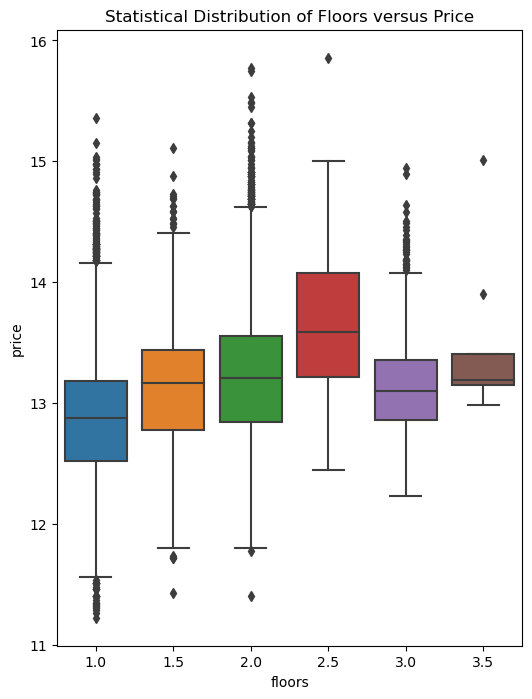

In [17]:
plt.figure(figsize=(6,8))
sns.boxplot( x=df['floors'], y=df['price'] )
plt.title('Statistical Distribution of Floors versus Price')
plt.show();

In [18]:
from scipy import stats
df = df[(np.abs(stats.zscore(df.price)) < 3)]

In [19]:
esik_degeri = 0.2

In [22]:
korelasyon_matrisi = df.corr()

C:\Users\tkaan\AppData\Local\Temp\ipykernel_7160\1715811118.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  korelasyon_matrisi = df.corr()


In [23]:
price_korelasyon = korelasyon_matrisi['price']

In [24]:
yuksek_korelasyonlu_kolonlar = price_korelasyon[abs(price_korelasyon) > esik_degeri].index

In [25]:
x = df[yuksek_korelasyonlu_kolonlar]

In [26]:
x

,price,bedrooms,bathrooms,sqft_living,floors,view,grade,sqft_above,sqft_basement,lat,sqft_living15
0,12.309982,3,1.00,1180,1.0,0,7,1180,0,47.5112,1340
1,13.195614,3,2.25,2570,2.0,0,7,2170,400,47.7210,1690
2,12.100712,2,1.00,770,1.0,0,6,770,0,47.7379,2720
3,13.311329,4,3.00,1960,1.0,0,7,1050,910,47.5208,1360
4,13.142166,3,2.00,1680,1.0,0,8,1680,0,47.6168,1800
...,...,...,...,...,...,...,...,...,...,...,...
21608,12.793859,3,2.50,1530,3.0,0,8,1530,0,47.6993,1530
21609,12.899220,4,2.50,2310,2.0,0,8,2310,0,47.5107,1830
21610,12.904459,2,0.75,1020,2.0,0,7,1020,0,47.5944,1020
21611,12.899220,3,2.50,1600,2.0,0,8,1600,0,47.5345,1410


In [27]:
x.describe()

,price,bedrooms,bathrooms,sqft_living,floors,view,grade,sqft_above,sqft_basement,lat,sqft_living15
count,21443.000000,21443.000000,21443.000000,21443.000000,21443.000000,21443.000000,21443.000000,21443.000000,21443.000000,21443.000000,21443.000000
mean,13.037067,3.365014,2.103285,2059.221984,1.492235,0.221984,7.637224,1772.956583,286.265401,47.559758,1976.396213
std,0.503120,0.924640,0.751043,870.437421,0.539502,0.740999,1.142390,797.940603,432.483079,0.138877,671.728081
min,11.477298,0.000000,0.000000,290.000000,1.000000,0.000000,1.000000,290.000000,0.000000,47.155900,399.000000
25%,12.676076,3.000000,1.500000,1420.000000,1.000000,0.000000,7.000000,1190.000000,0.000000,47.469600,1480.000000
50%,13.017003,3.000000,2.250000,1910.000000,1.500000,0.000000,7.000000,1560.000000,0.000000,47.571100,1830.000000
75%,13.367660,4.000000,2.500000,2530.000000,2.000000,0.000000,8.000000,2190.000000,550.000000,47.678300,2350.000000
max,14.626441,33.000000,7.500000,7730.000000,3.500000,4.000000,13.000000,7420.000000,3260.000000,47.777600,5790.000000


In [28]:
x = x.drop('price', axis=1)

In [64]:
x.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'view', 'grade',
       'sqft_above', 'sqft_basement', 'lat', 'sqft_living15',
       'yatak_odasi_banyo_orani'],
      dtype='object')

In [30]:
y = df[["price"]]

In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [81]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=42)

In [82]:
lr = LinearRegression()

In [83]:
model = lr.fit(x_train,y_train)

In [84]:
tahmin = model.predict(x_test)

In [85]:
from sklearn.metrics import mean_squared_error, r2_score

In [86]:
(mean_squared_error(tahmin,y_test))**.5

0.49634979580380073

In [87]:
r2_score(tahmin,y_test)

-205.54688450897052